---
# Multi-Layer Perceptron
---

### Multi-Layer Perceptron Introduction

A multi-layer perceptron (MLP) has the same structure of a single layer perceptron with one or more hidden layers. The backpropagation algorithm consists of two phases: the forward phase where the activations are propagated from the input to the output layer, and the backward phase, where the error between the observed actual and the requested nominal value in the output layer is propagated backwards in order to modify the weights and bias values.

## Task

In order to do this we will need the following libraries:
- [matplotlib] (https://matplotlib.org/)
- [pandas] (https://pandas.pydata.org/)
- [numpy] (https://numpy.org/)
- [seaborn] (https://seaborn.pydata.org/)
- [scikit-learn] (https://scikit-learn.org/)
...

In [3]:
# Import important libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns


## Prepare Data and Check information

### Import the data

In [5]:
df = pd.read_csv ('taxis.csv').dropna()

In [58]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [59]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

### Change data type

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6342 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6342 non-null   object 
 1   dropoff          6342 non-null   object 
 2   passengers       6342 non-null   int64  
 3   distance         6342 non-null   float64
 4   fare             6342 non-null   float64
 5   tip              6342 non-null   float64
 6   tolls            6342 non-null   float64
 7   total            6342 non-null   float64
 8   color            6342 non-null   object 
 9   payment          6342 non-null   object 
 10  pickup_zone      6342 non-null   object 
 11  dropoff_zone     6342 non-null   object 
 12  pickup_borough   6342 non-null   object 
 13  dropoff_borough  6342 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 743.2+ KB


### Replace Null value

In [61]:
df.isnull().count()

pickup             6342
dropoff            6342
passengers         6342
distance           6342
fare               6342
tip                6342
tolls              6342
total              6342
color              6342
payment            6342
pickup_zone        6342
dropoff_zone       6342
pickup_borough     6342
dropoff_borough    6342
dtype: int64

In [62]:
# count of missing values
df.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

### Check duplicated values

In [63]:
# check if there exist the duplicate rows
duplicates = df[df.duplicated()]
print(len(duplicates))

0


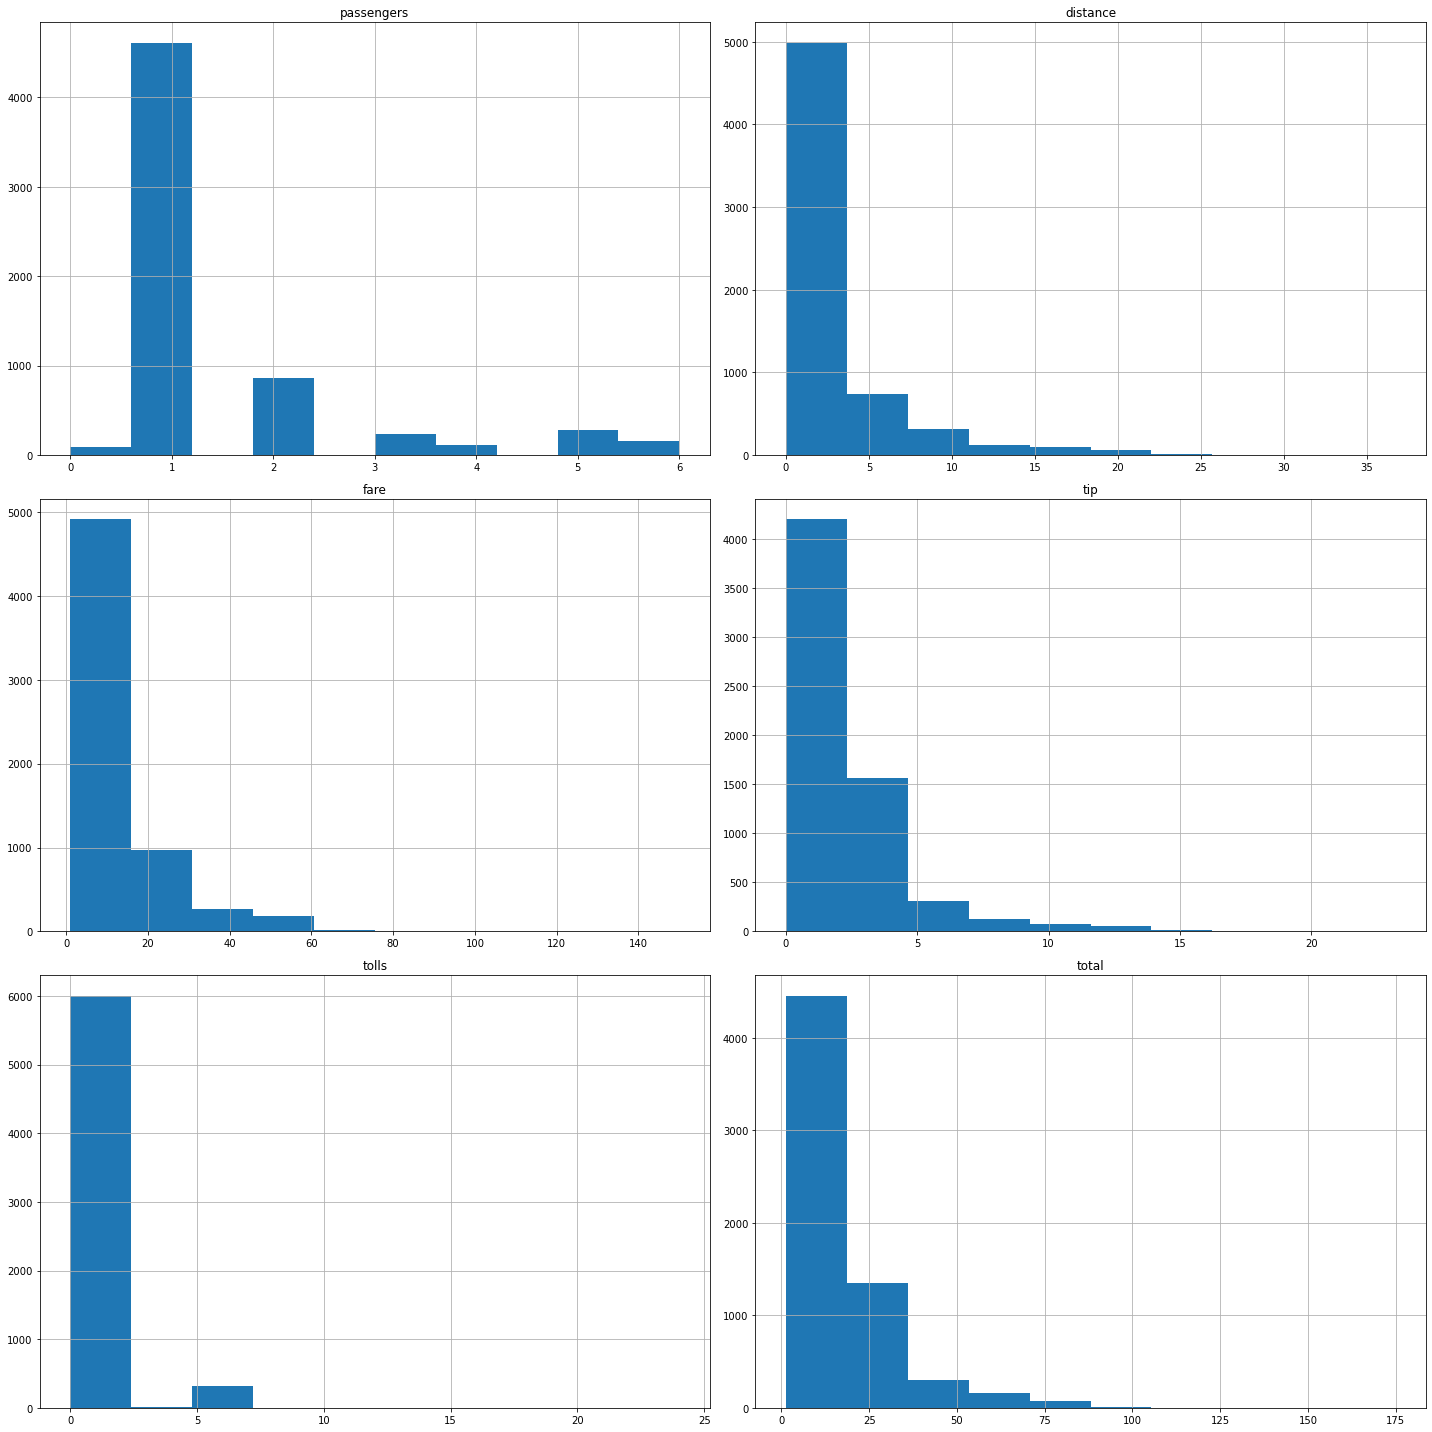

In [64]:
#Histogram views to get knowledge of various feature
df.hist(figsize = (20,20))
plt.tight_layout()
plt.show()

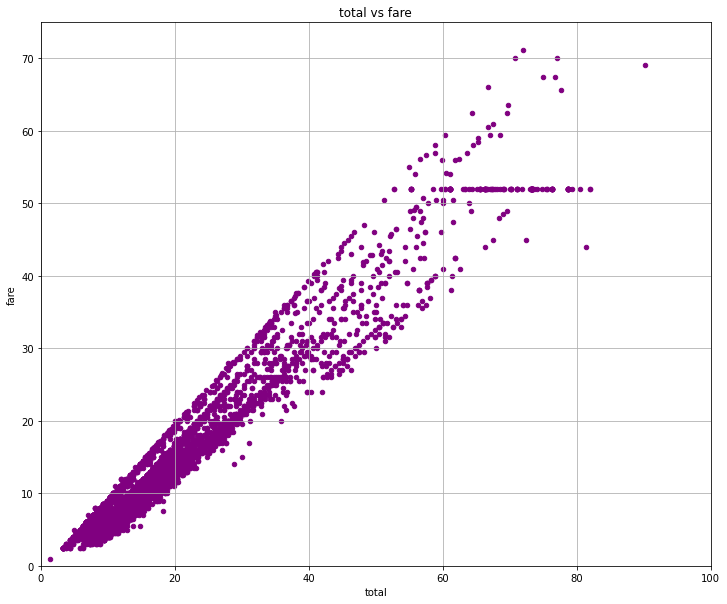

In [26]:
df.plot(kind='scatter',x= 'total',y='fare',color='purple',figsize = (12,10), grid = True)
plt.gca().set(xlim=(0, 100), ylim=(0, 75) )
plt.xlabel('total')
plt.ylabel('fare')
plt.title('total vs fare')
plt.show()

As the fare increases the total price increases. They have a direct relation

### Investigate Passengers

In [65]:
df['passengers'].value_counts()

1    4608
2     865
5     277
3     240
6     152
4     109
0      91
Name: passengers, dtype: int64

### Investigate Fare

In [66]:
df['fare'].describe().round(0)

count    6342.0
mean       13.0
std        11.0
min         1.0
25%         6.0
50%        10.0
75%        15.0
max       150.0
Name: fare, dtype: float64

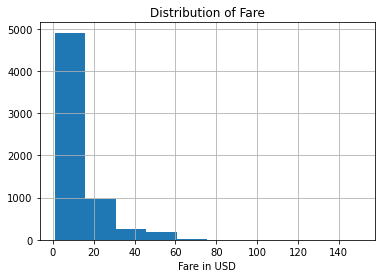

In [67]:
# View fare distribution
df['fare'].hist()
plt.xlabel('Fare in USD')
plt.title('Distribution of Fare')
plt.show()

In [68]:
df_less4 = df[df['fare'] <= 10000]

In [69]:
df_less4['fare'].describe().round(0)

count    6342.0
mean       13.0
std        11.0
min         1.0
25%         6.0
50%        10.0
75%        15.0
max       150.0
Name: fare, dtype: float64

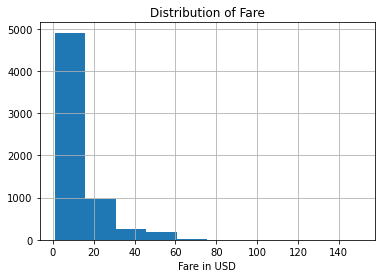

In [70]:
# View fare distribution
df_less4['fare'].hist()
plt.xlabel('Fare in USD')
plt.title ('Distribution of Fare')
plt.show()

### Investigate distance

In [71]:
df['distance'].describe().round(0)

count    6342.0
mean        3.0
std         4.0
min         0.0
25%         1.0
50%         2.0
75%         3.0
max        37.0
Name: distance, dtype: float64

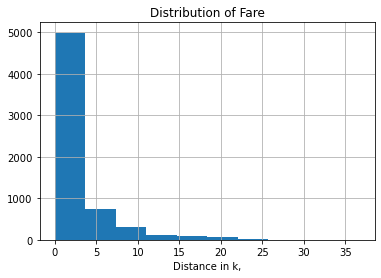

In [72]:
# View fare distribution
df['distance'].hist()
plt.xlabel('Distance in k,')
plt.title('Distribution of Fare')
plt.show()

### Investigate sqft_lot

In [73]:
df['distance'].describe().round(0)

count    6342.0
mean        3.0
std         4.0
min         0.0
25%         1.0
50%         2.0
75%         3.0
max        37.0
Name: distance, dtype: float64

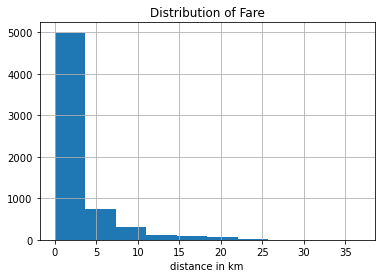

In [74]:
# View fare distribution
df['distance'].hist()
plt.xlabel('distance in km')
plt.title('Distribution of Fare')
plt.show()

###  Ploting

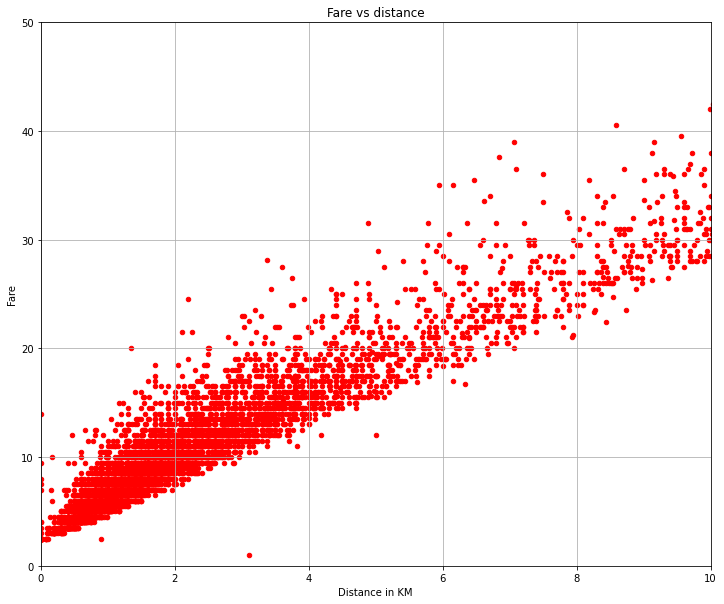

In [75]:
df.plot(kind='scatter',x= 'distance',y='fare',color='red',figsize = (12,10), grid = True)
plt.gca().set(xlim=(0.0, 10), ylim=(0, 50) )
plt.xlabel('Distance in KM')
plt.ylabel('Fare')
plt.title('Fare vs distance')
plt.show()

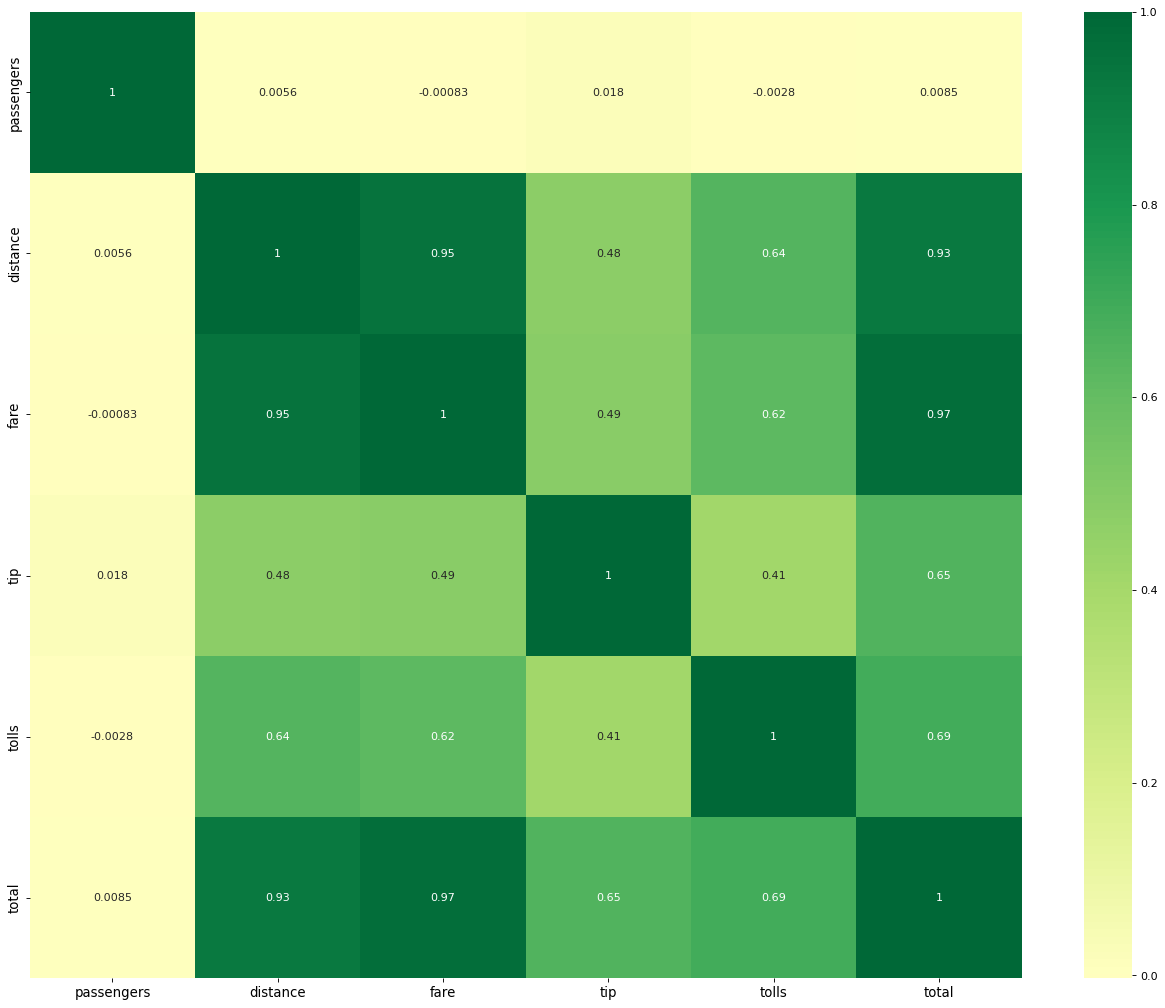

In [76]:
plt.figure(figsize=(20,16), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.yticks(fontsize=12)

plt.xticks(fontsize=12)
plt.show()

In [77]:
# create a copy of df with fare less than 1 thousand
df_less2 = df[df['fare'] <= 1000]

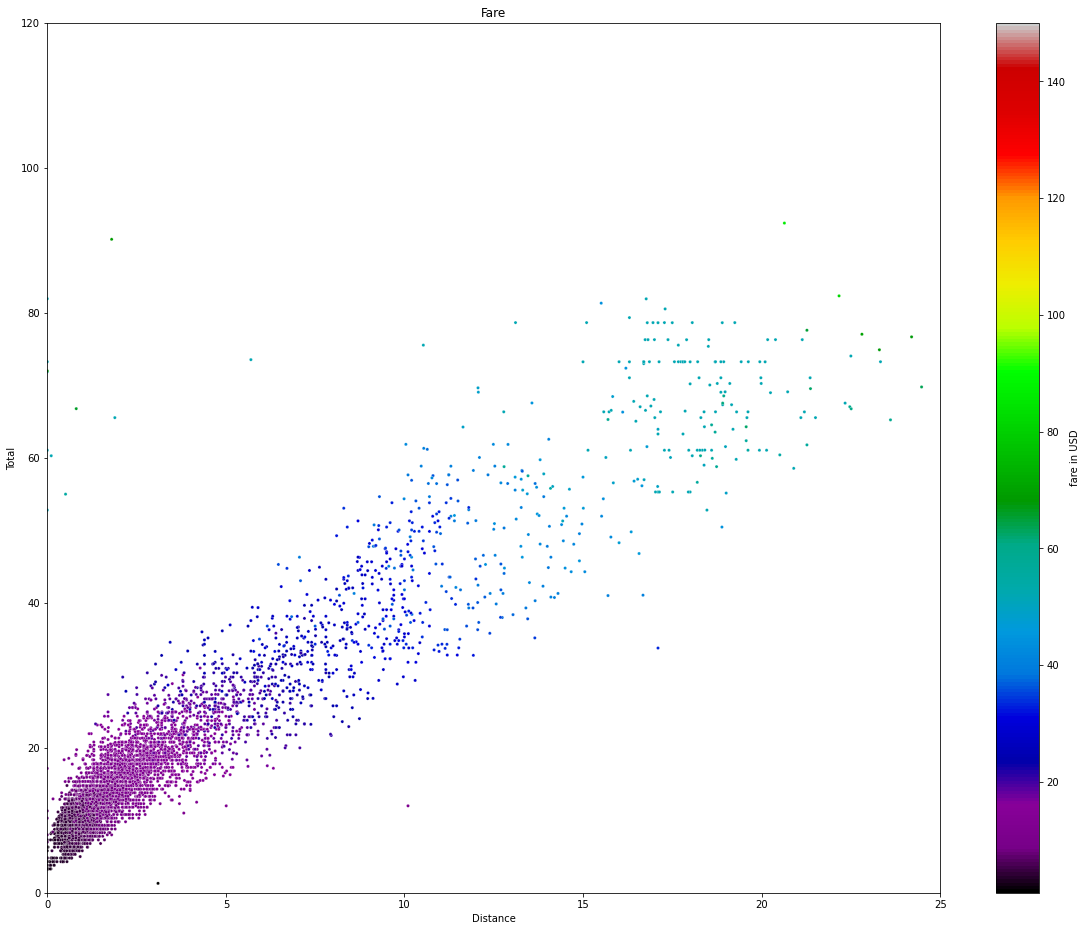

In [78]:
# Plot scatter plot
plt.figure(figsize = (20,16))
ax = sns.scatterplot(x = df_less2['distance'], y = df_less2['total'], hue = df_less2['fare'],
                palette = 'nipy_spectral',s=10, legend = None, data = df_less2)

norm = plt.Normalize(df_less2['fare'].min(), df_less2['fare'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])
ax.figure.colorbar(smap, label = 'fare in USD')
plt.gca().set(xlim=(0.0, 25), ylim=(0, 120) )

plt.xlabel('Distance')
plt.ylabel('Total')
plt.title('Fare')
plt.show()

### Investigate Pickup Zone

In [79]:
df_less2.shape

(6342, 14)

In [80]:
# Explore pickup_zone
df_less2['pickup_zone'].value_counts()

Midtown Center                  227
Penn Station/Madison Sq West    209
Upper East Side South           208
Clinton East                    208
Midtown East                    196
                               ... 
Highbridge Park                   1
Brighton Beach                    1
Bronx Park                        1
Crotona Park East                 1
Hillcrest/Pomonok                 1
Name: pickup_zone, Length: 194, dtype: int64

In [81]:
# Extract fare and pickup-zone from our dataset
df_zip = df_less2[['pickup_zone', 'fare']]

In [82]:
df_zip

,pickup_zone,fare
0,Lenox Hill West,7.0
1,Upper West Side South,5.0
2,Alphabet City,7.5
3,Hudson Sq,27.0
4,Midtown East,9.0
...,...,...
6428,East Harlem North,4.5
6429,Jamaica,58.0
6430,Crown Heights North,16.0
6431,East New York,6.0


In [83]:
# Groupby pickupzone and take median fare
df_zipmean = df_zip.groupby(df_zip['pickup_zone']).median()

In [84]:
# Reset index after groupy
df_zipmean = df_zipmean.reset_index()

# Change type to str
df_zipmean['pickup_zone'] = df_zipmean['pickup_zone'].astype(str)

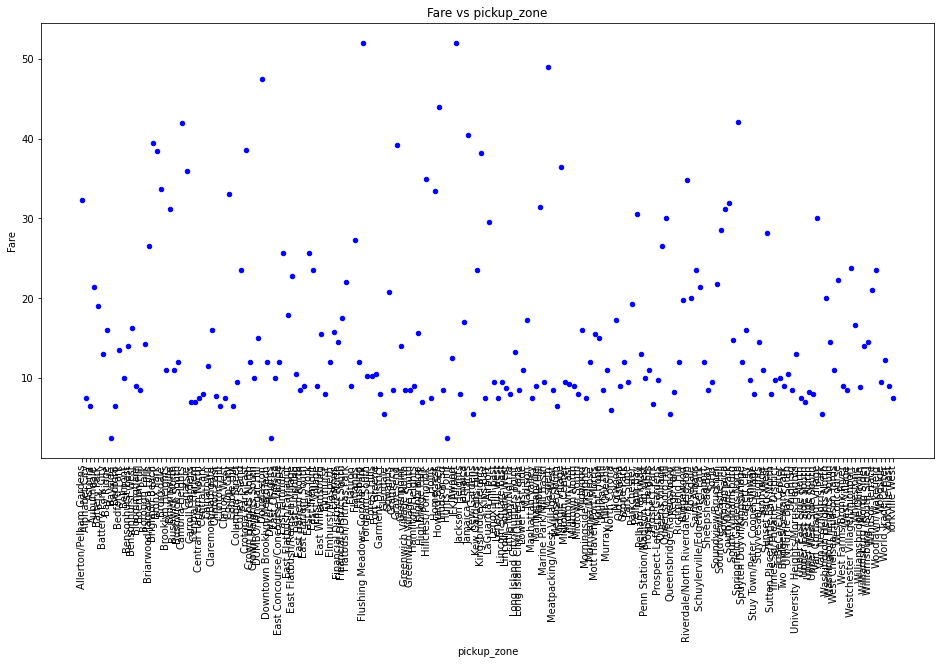

In [85]:
df_zipmean.plot(kind='scatter',x='pickup_zone', y='fare', color='blue',figsize = (16,8))
plt.xlabel('pickup_zone')
plt.xticks(rotation = 90)
plt.ylabel('Fare')
plt.title('Fare vs pickup_zone')
plt.show()

In [86]:
# Get top 10 zipcode mean prices
dftop10 = df_zipmean.sort_values('fare', ascending = False)[:10]

## Price vs Features

### Binary features -Payment

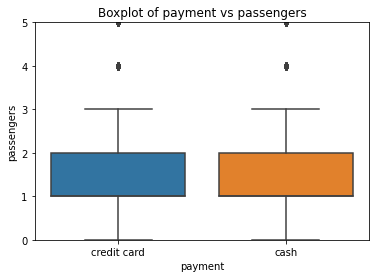

In [87]:
sns.boxplot(x = df_less2['payment'], y = df['passengers'])
plt.gca().set(ylim=(0, 5) )
plt.title("Boxplot of payment vs passengers")
plt.xticks(np.arange(2), ('credit card', 'cash'))
plt.show()

### Categorical features

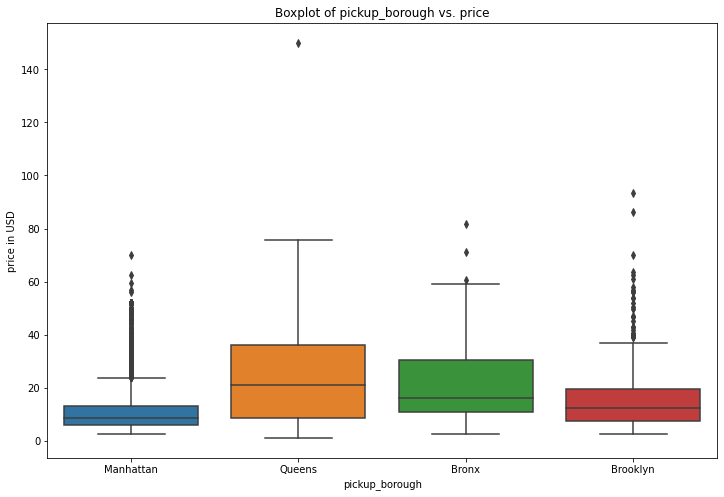

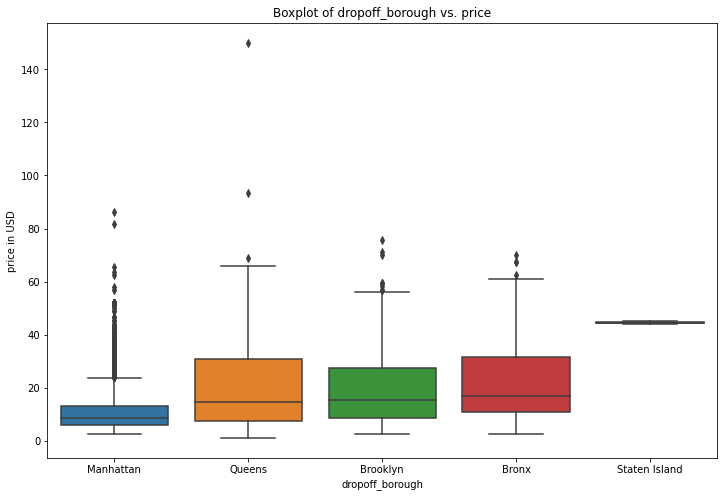

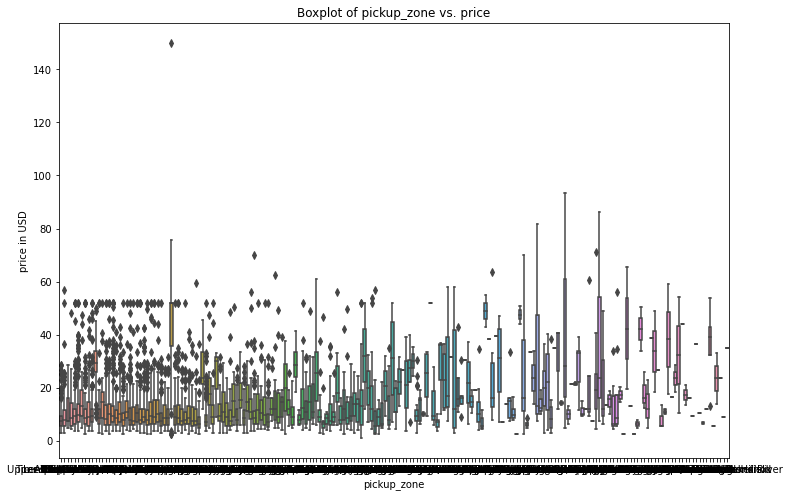

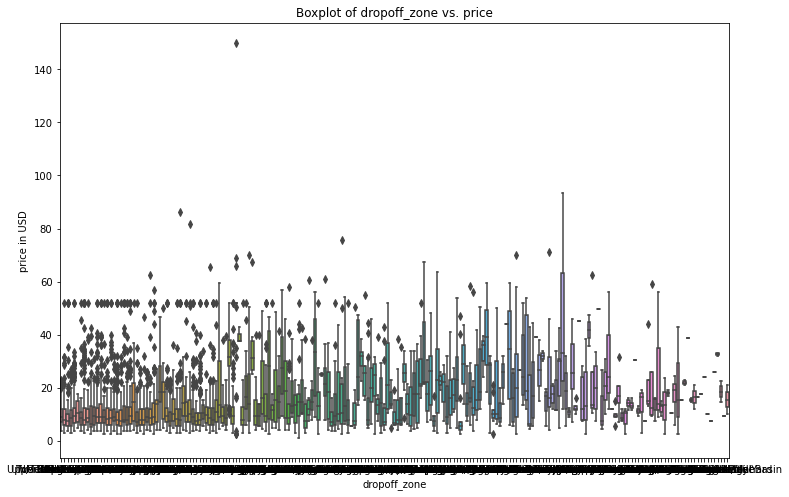

In [88]:
# Define categorical variables
categorical_features = ['pickup_borough', 'dropoff_borough','pickup_zone', 'dropoff_zone']

# Plot boxplots
for feature in categorical_features:
    plt.figure(figsize = (12,8))
    sns.boxplot(x = df_less2[feature], y = df_less2['fare'])
    plt.title(f"Boxplot of {feature} vs. price")
    plt.ylabel("price in USD")
    plt.xlabel(f"{feature}")
    plt.show()

### Continuous features

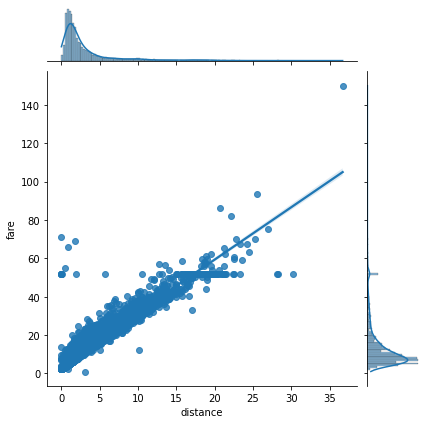

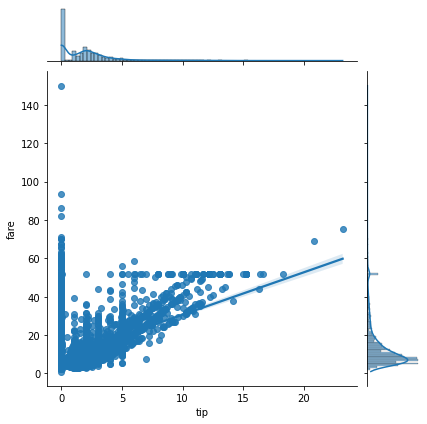

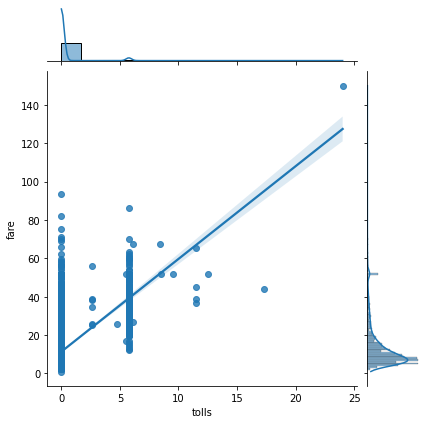

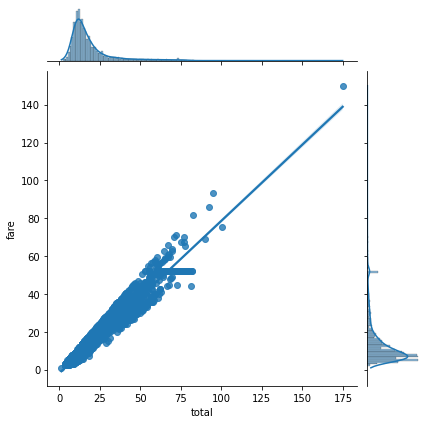

In [89]:
# Define list of continuous variables
continous_features = ['distance', 'tip', 'tolls', 'total']


#  Plot jointplots
for feature in continous_features:
    sns.jointplot(x = df_less2[feature], y = df_less2['fare'], kind = 'reg')


## Selcect features and clean data

In [90]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [91]:
#  df_clean = df_less2.drop(['id', 'date','sqft_above','sqft_lot', 'sqft_living15', 
#                            'sqft_lot15','floors','view','condition','lat', 'long',
#                           'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',], axis = 1)
df_clean = df_less2.drop(['pickup', 'dropoff', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough','payment','color'], axis = 1)

In [92]:
df_clean.head()

,passengers,distance,fare,tip,tolls,total
0,1,1.60,7.0,2.15,0.0,12.95
1,1,0.79,5.0,0.00,0.0,9.30
2,1,1.37,7.5,2.36,0.0,14.16
3,1,7.70,27.0,6.15,0.0,36.95
4,3,2.16,9.0,1.10,0.0,13.40


## Train-Test Split Data

In [93]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [94]:
# Split features X and target y
X = df_clean.drop('fare', axis = 1)
y = df_clean['fare']

In [95]:
# Train-test split (10% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [96]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

5707 635 5707 635


## MLP Model

The algorithm used for analyzing the data was neural networks. A six hidden layer network was built (see figure below) based on the tensor flow technique. This network combines the “wide” and “deep'' approaches, initially allowing for multiple connections from the input nodes to the first hidden layer and restricting the number of connections at each layer. This provides the model with more flexibility in determining the weights of each feature at each layer. However, while this approach is generally more accurate, it also increases the probability of overfitting and significantly increases computational complexity. 



In [97]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import activations
from keras.utils.vis_utils import plot_model

### Train-Test Split Data

In [98]:

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_np)
X_test_s = scaler.fit_transform(X_test_np)

X_train_s, X_valid_s, y_train_np, y_valid_np = train_test_split(X_train_s, y_train_np)

In [99]:


input_ = keras.layers.Input(shape=X_train_s.shape[1])
hidden1 = keras.layers.Dense(50, activation = activations.relu)(input_)
hidden2 = keras.layers.Dense(40, activation = activations.relu)(hidden1)
hidden3 = keras.layers.Dense(30, activation = activations.relu)(hidden2)
hidden4 = keras.layers.Dense(20, activation = activations.relu)(hidden3)
hidden5 = keras.layers.Dense(10, activation = activations.relu)(hidden4)
hidden6 = keras.layers.Dense(8, activation = activations.relu)(hidden5)
output = keras.layers.Dense(1, activation = activations.relu)(hidden6)

model = keras.Model(inputs=[input_], outputs = [output])
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')


history = model.fit(X_train_s, y_train_np, epochs = 10, validation_data = (X_valid_s, y_valid_np))

mse_test = model.evaluate(X_test_s, np.array(y_test_np))
print(mse_test)

X_new = X_test_s
y_hat = model.predict(X_new)

print("predict", y_hat)
print("actual", np.array(y_test))

plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

Epoch 1/10
134/134 [==============================] - 1s 5ms/step - loss: 289.7906 - val_loss: 271.7278
Epoch 2/10
134/134 [==============================] - 0s 3ms/step - loss: 289.7906 - val_loss: 271.7278
Epoch 3/10
134/134 [==============================] - 0s 3ms/step - loss: 289.7906 - val_loss: 271.7278
Epoch 4/10
134/134 [==============================] - 0s 3ms/step - loss: 289.7906 - val_loss: 271.7278
Epoch 5/10
134/134 [==============================] - 0s 3ms/step - loss: 289.7905 - val_loss: 271.7278
Epoch 6/10
134/134 [==============================] - 0s 3ms/step - loss: 289.7906 - val_loss: 271.7278
Epoch 7/10
134/134 [==============================] - 0s 3ms/step - loss: 289.7906 - val_loss: 271.7278
Epoch 8/10
134/134 [==============================] - 0s 3ms/step - loss: 289.7906 - val_loss: 271.7278
Epoch 9/10
134/134 [==============================] - 0s 3ms/step - loss: 289.7905 - val_loss: 271.7278
Epoch 10/10
20/20 [==============================] - 0s 2ms/step

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Text(0, 0.5, 'RMSE: 15.58\nAverage Percent Error: 18.099999999999998%\nDatapoints below 18.099999999999998 = 441\nDatapoints above 18.099999999999998 = 194')

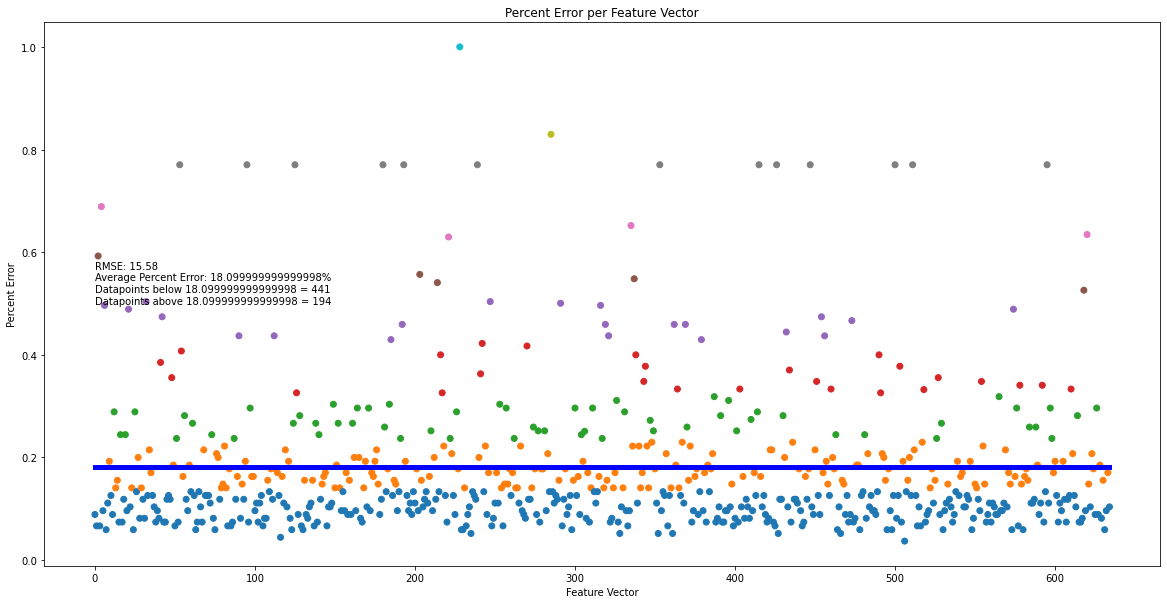

In [100]:
fig, ax = plt.subplots(1,1,figsize = (20,10))

print(y_hat[:,0])
print(y_test_np)

percent_error = (np.sqrt((y_hat[:,0] - y_test_np)**2))/np.max(y_test_np)
print(percent_error)

ax.scatter(range(y_hat.shape[0]), percent_error, c = percent_error, cmap = 'tab10')

ax.set_title('Percent Error per Feature Vector')
ax.set_ylabel('Percent Error')
ax.set_xlabel('Feature Vector')

RMSE = np.round(np.sqrt(mean_squared_error(y_test_np, y_hat)),2)
MPE = np.round(percent_error.sum()/y_hat.shape[0],3) * 100

ax.plot(range(y_hat.shape[0]), np.ones(y_hat.shape[0]) * MPE/100, color = 'b', linewidth = 5.0)


line1 = "RMSE: " + str(RMSE)
line2 = "\nAverage Percent Error: " + str(MPE) +"%"
line3 = "\nDatapoints below " + str(MPE) + " = " + str((percent_error < MPE/100).sum())
line4 = "\nDatapoints above " + str(MPE) + " = " + str((percent_error > MPE/100).sum())

text = line1 + line2 + line3 + line4
ax.text(0,.5, text)
